In [25]:

pip install sklearn

Processing /home/user/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c/sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 7.1 MB 989 kB/s eta 0:00:01     |█████████████████▎              | 3.8 MB 562 kB/s eta 0:00:06     |██████████████████████████████▉ | 6.8 MB 989 kB/s eta 0:00:01
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
df = pd.read_csv('questao3.csv', delimiter=",")


df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [12]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1, inplace=True)

In [13]:
df.duplicated()
df.drop_duplicates(keep = False, inplace = True) 
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [14]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.161976,0.269280,0.994392,0.316847,0.255359,0.183631,0.090961,0.150136
num_comments,0.161976,1.000000,0.640432,0.110539,0.521416,0.164640,0.325079,0.284761,0.256788
num_shares,0.269280,0.640432,1.000000,0.187432,0.820569,0.412019,0.399902,0.242637,0.356150
num_likes,0.994392,0.110539,0.187432,1.000000,0.216508,0.191800,0.125721,0.063348,0.106857
num_loves,0.316847,0.521416,0.820569,0.216508,1.000000,0.511524,0.507967,0.251003,0.423345
num_wows,0.255359,0.164640,0.412019,0.191800,0.511524,1.000000,0.289194,0.097945,0.202104
num_hahas,0.183631,0.325079,0.399902,0.125721,0.507967,0.289194,1.000000,0.170304,0.240888
num_sads,0.090961,0.284761,0.242637,0.063348,0.251003,0.097945,0.170304,1.000000,0.145951
num_angrys,0.150136,0.256788,0.356150,0.106857,0.423345,0.202104,0.240888,0.145951,1.000000


In [15]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [16]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

,num_reactions,num_comments,num_shares,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.161976,0.269280,0.255359,0.183631,0.090961,0.150136
num_comments,0.161976,1.000000,0.640432,0.164640,0.325079,0.284761,0.256788
num_shares,0.269280,0.640432,1.000000,0.412019,0.399902,0.242637,0.356150
num_wows,0.255359,0.164640,0.412019,1.000000,0.289194,0.097945,0.202104
num_hahas,0.183631,0.325079,0.399902,0.289194,1.000000,0.170304,0.240888
num_sads,0.090961,0.284761,0.242637,0.097945,0.170304,1.000000,0.145951
num_angrys,0.150136,0.256788,0.356150,0.202104,0.240888,0.145951,1.000000


In [17]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,0,0,0,0


In [18]:
print(df['status_type'].value_counts())
print(df['status_published'].value_counts())
print(df['num_reactions'].value_counts())
print(df['num_comments'].value_counts())
print(df['num_shares'].value_counts())
print(df['num_wows'].value_counts())
print(df['num_hahas'].value_counts())
print(df['num_sads'].value_counts())
print(df['num_angrys'].value_counts())


photo     4200
video     2332
status     353
link        63
Name: status_type, dtype: int64
11/15/2017 9:55    2
3/20/2017 21:46    2
5/28/2013 3:13     2
3/31/2013 9:57     2
5/25/2018 6:54     2
                  ..
2/11/2015 22:18    1
5/12/2018 5:55     1
8/17/2012 8:00     1
12/7/2016 4:39     1
7/24/2017 8:44     1
Name: status_published, Length: 6863, dtype: int64
1       131
2       124
14      121
0       121
3       116
       ... 
2419      1
346       1
342       1
2383      1
1933      1
Name: num_reactions, Length: 1043, dtype: int64
0       2119
1        564
2        360
3        307
4        249
        ... 
506        1
502        1
486        1
482        1
2021       1
Name: num_comments, Length: 988, dtype: int64
0       3905
1        808
2        308
3        153
4        103
        ... 
190        1
234        1
246        1
258        1
1379       1
Name: num_shares, Length: 501, dtype: int64
0      5286
1       698
2       341
3       206
4       131
       ...

In [19]:
for i in df['status_type']:
    df['status_type'].replace(to_replace = 'photo', value = 0, inplace=True)
    df['status_type'].replace(to_replace = 'video', value = 1, inplace=True)
    df['status_type'].replace(to_replace = 'status', value = 2, inplace=True)
    df['status_type'].replace(to_replace = 'link', value = 3, inplace=True)

In [20]:
print(df['status_type'].value_counts())



0    4200
1    2332
2     353
3      63
Name: status_type, dtype: int64


In [21]:
df.drop(['status_published'], axis=1, inplace=True)
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(df)



False    6946
True        2
dtype: int64
                              status_id  status_type  num_reactions  \
0      246675545449582_1649696485147474            1            529   
1      246675545449582_1649426988507757            0            150   
2      246675545449582_1648730588577397            1            227   
3      246675545449582_1648576705259452            0            111   
4      246675545449582_1645700502213739            0            213   
...                                 ...          ...            ...   
7045  1050855161656896_1061863470556065            0             89   
7046  1050855161656896_1061334757275603            0             16   
7047  1050855161656896_1060126464063099            0              2   
7048  1050855161656896_1058663487542730            0            351   
7049  1050855161656896_1050858841656528            0             17   

      num_comments  num_shares  num_wows  num_hahas  num_sads  num_angrys  
0              512         262

In [22]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,1,529,512,262,3,1,1,0
1,246675545449582_1649426988507757,0,150,0,0,0,0,0,0
2,246675545449582_1648730588577397,1,227,236,57,1,1,0,0
3,246675545449582_1648576705259452,0,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,0,213,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,0,89,0,0,0,0,0,0
7046,1050855161656896_1061334757275603,0,16,0,0,0,1,0,0
7047,1050855161656896_1060126464063099,0,2,0,0,0,0,0,0
7048,1050855161656896_1058663487542730,0,351,12,22,0,0,0,0


In [23]:
#NORMALIZACAO
col = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_numeric = df[col]
# Normalize all of the numeric columns
df_normalized = (df_numeric - df_numeric.mean()) / df_numeric.std()
dfbu = df
df_normalized




,status_type,num_reactions,num_comments,num_shares,num_wows,num_hahas,num_sads,num_angrys
0,0.841465,0.698453,0.318271,1.671426,0.204264,0.075355,0.575313,-0.165408
1,-0.730145,-0.157540,-0.253156,-0.305697,-0.139276,-0.175564,-0.163615,-0.165408
2,0.841465,0.016369,0.010236,0.124441,-0.024762,0.075355,-0.163615,-0.165408
3,-0.730145,-0.245623,-0.253156,-0.305697,-0.139276,-0.175564,-0.163615,-0.165408
4,-0.730145,-0.015251,-0.253156,-0.305697,-0.139276,-0.175564,-0.163615,-0.165408
...,...,...,...,...,...,...,...,...
7045,-0.730145,-0.295312,-0.253156,-0.305697,-0.139276,-0.175564,-0.163615,-0.165408
7046,-0.730145,-0.460186,-0.253156,-0.305697,-0.139276,0.075355,-0.163615,-0.165408
7047,-0.730145,-0.491806,-0.253156,-0.305697,-0.139276,-0.175564,-0.163615,-0.165408
7048,-0.730145,0.296430,-0.239763,-0.139679,-0.139276,-0.175564,-0.163615,-0.165408


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,1.561963,0.070796
1,-0.678219,-0.050978
2,0.181413,-0.068093
3,-0.702606,-0.004497
4,-0.638824,-0.126061
...,...,...
6941,-0.716363,0.021722
6942,-0.667982,0.091389
6943,-0.770766,0.125409
6944,-0.461692,-0.275988


In [28]:
df = pd.concat([principalDf, df[['status_id']]], axis = 1)
df

,principal component 1,principal component 2,status_id
0,1.561963,0.070796,246675545449582_1649696485147474
1,-0.678219,-0.050978,246675545449582_1649426988507757
2,0.181413,-0.068093,246675545449582_1648730588577397
3,-0.702606,-0.004497,246675545449582_1648576705259452
4,-0.638824,-0.126061,246675545449582_1645700502213739
...,...,...,...
7045,NaN,NaN,1050855161656896_1061863470556065
7046,NaN,NaN,1050855161656896_1061334757275603
7047,NaN,NaN,1050855161656896_1060126464063099
7048,NaN,NaN,1050855161656896_1058663487542730


In [29]:
df.dropna(inplace=True)
df

,principal component 1,principal component 2,status_id
0,1.561963,0.070796,246675545449582_1649696485147474
1,-0.678219,-0.050978,246675545449582_1649426988507757
2,0.181413,-0.068093,246675545449582_1648730588577397
3,-0.702606,-0.004497,246675545449582_1648576705259452
4,-0.638824,-0.126061,246675545449582_1645700502213739
...,...,...,...
6941,-0.716363,0.021722,1050855161656896_1352631754812567
6942,-0.667982,0.091389,1050855161656896_1352080761534333
6943,-0.770766,0.125409,1050855161656896_1351877658221310
6944,-0.461692,-0.275988,1050855161656896_1351719188237157


In [30]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering().fit(df)
AgglomerativeClustering(n_clusters=8, linkage = 'single')
clustering.labels_

array([0, 0, 0, ..., 1, 1, 1])

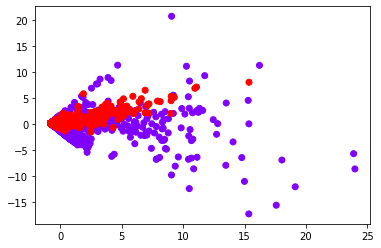

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clustering.labels_, cmap='rainbow')

In [32]:
clustering = AgglomerativeClustering().fit(df)
AgglomerativeClustering(n_clusters=8, linkage = 'complete')
clustering.labels_


array([0, 0, 0, ..., 1, 1, 1])

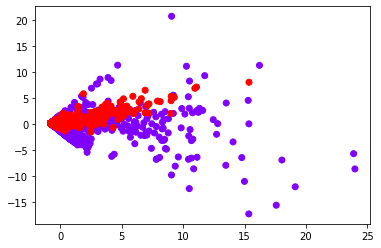

In [33]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clustering.labels_, cmap='rainbow')

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=2).fit(df)
kmeans.labels_


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [38]:

kmeans.cluster_centers_


array([[-7.04344496e-02, -5.84200589e-02,  6.08710295e+29],
       [ 4.80848532e-01,  4.65912160e-01,  1.05085516e+31]])

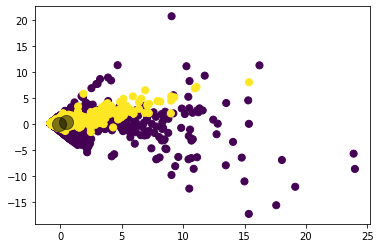

In [39]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.predict(df), s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);